In [55]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Pair Programming Intro Machine Learning

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. 

Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. 

De forma que vamos a probar a realizar **ajustes lineales** con el fin de predecir alguna de sus **variables**. 
Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

# Objetivos

Los objetivos de hoy son:

- Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables **numéricas** y **categóricas**, primando que haya más de una variable de tipo numérico.
- Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten **ligeramente limpios** para facilitar los análisis.
- Explicar los **datos** y las **variables** disponibles en el conjunto de datos seleccionado:
- Esto se hace para que **comprendais** mejor los datos con los que estais trabajando.
- Realizar un **EDA** sencillo para la variable **dependiente** y la variable **independiente**.

In [56]:
df = pd.read_csv("data/00-insurance.csv", index_col = 0).reset_index()
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [57]:
df_copi=df.copy()
df_copi.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


## Entender las variables que tenemos y como es nuetro dataframe. 

In [58]:
# número de filas y columnas del dataframe

df.shape

(1338, 7)

In [59]:
# información general del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
# nombre de las columnas de nuestro dataframe

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
# principales estadísticos de las columnas numéricas. recordemos que por defecto el describe nos devuelve las numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [62]:
# principales estadisticos de las variables categóricas

df.describe(include ="object").T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [63]:
# valores nulos en el dataframe

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
# duplicados 

df.duplicated().sum()

1

In [65]:
df[df.duplicated()== True] # Para ver la fila duplicada

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [66]:
df_copi.drop_duplicates(inplace=True)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

0

# Outliers

In [69]:
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


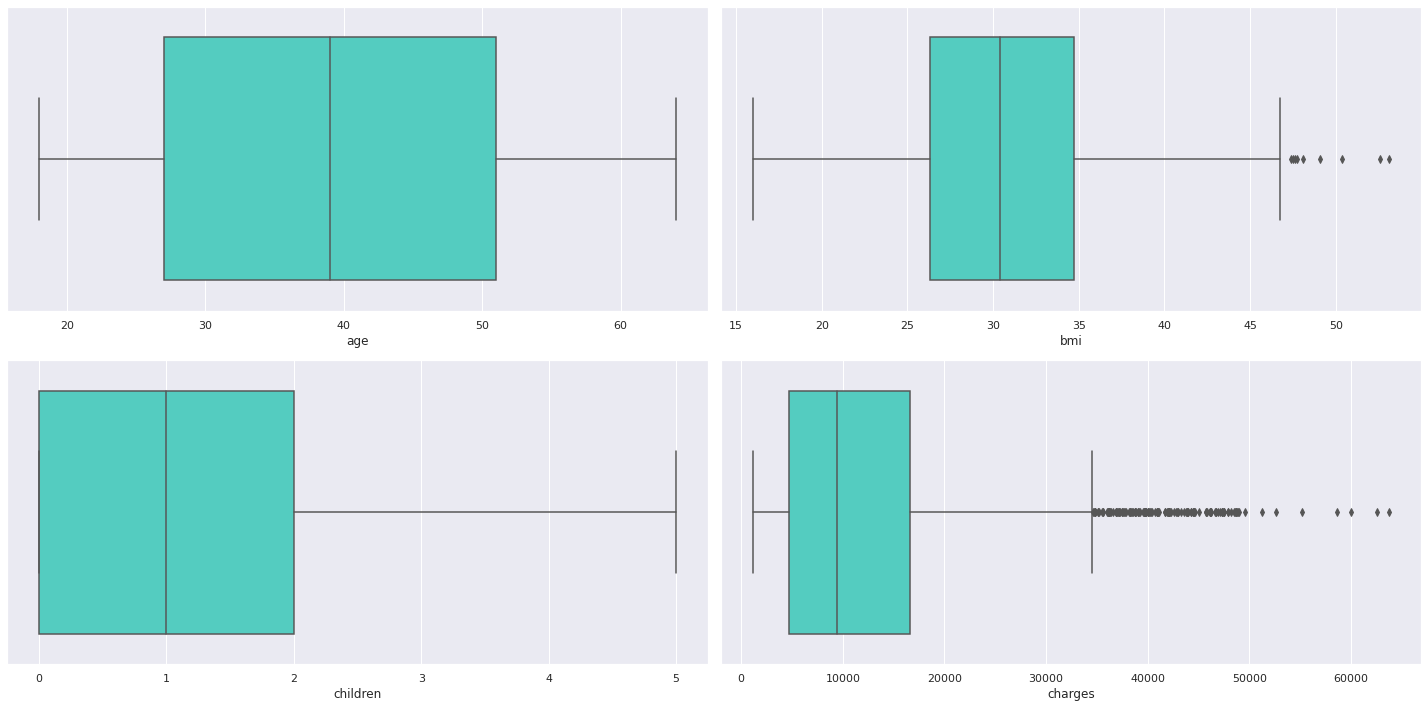

In [70]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad

    
plt.tight_layout()


plt.show();

Como hemos visto que los boxplot tienen muchos outlier, vemos las distribuciones para ver si tenemos que decidir el tratamiento.

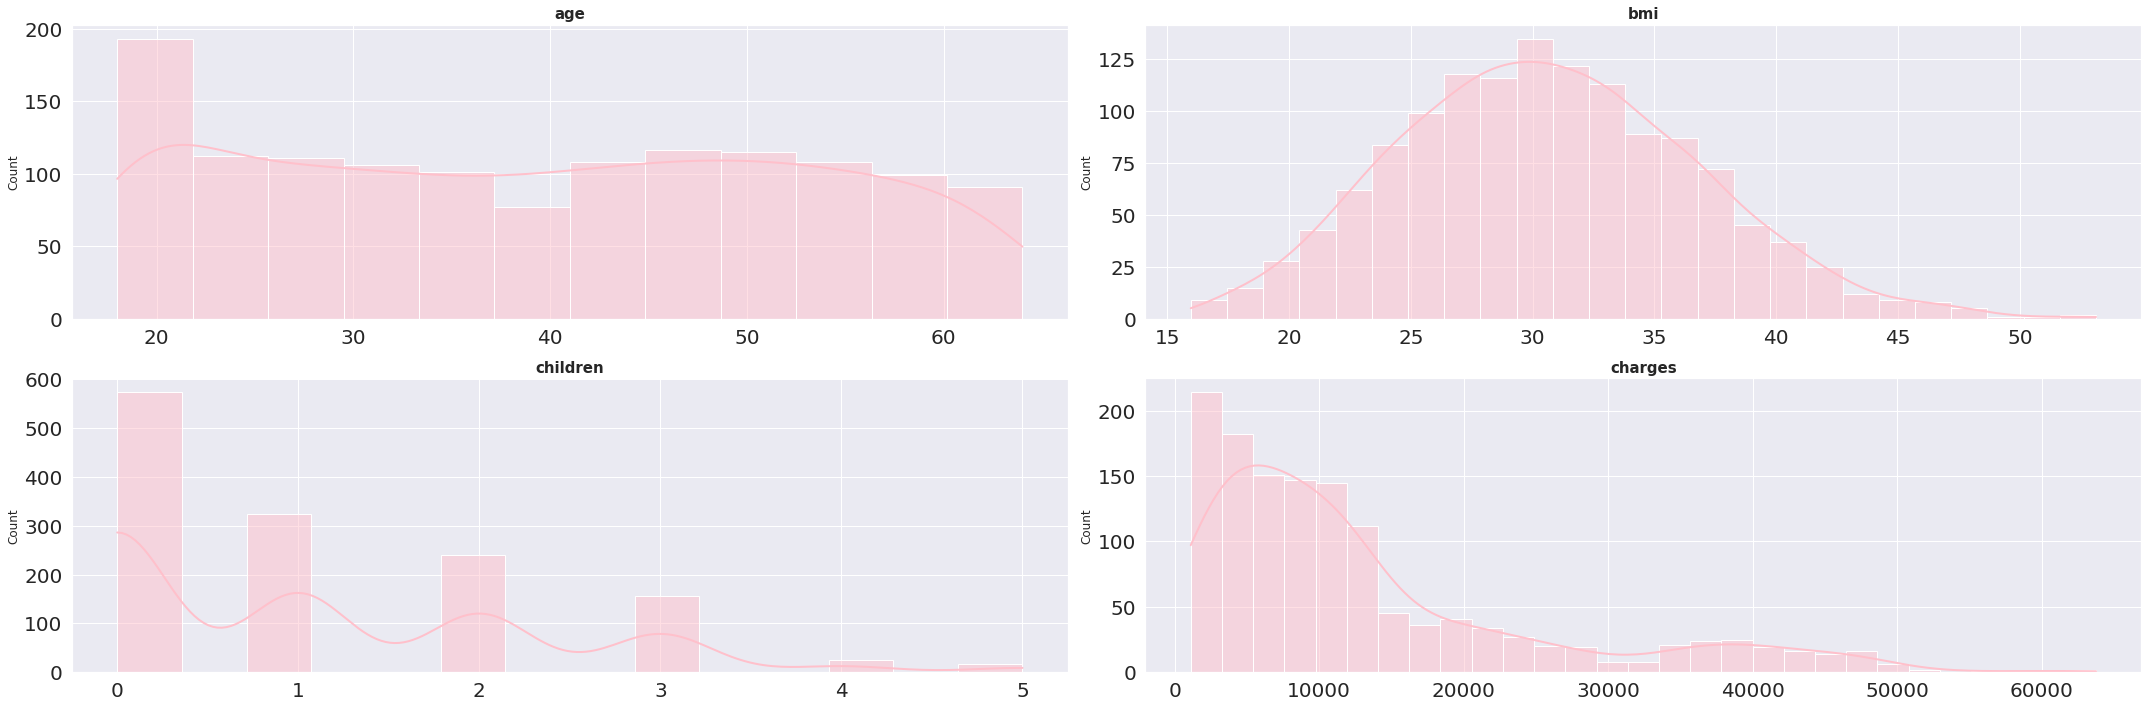

In [71]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat#iterador


for i, colum in enumerate(numericas.columns): 
    sns.histplot(
        data = numericas[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();


#### Empezamos a intentar fragmentar la muestra, primero por hábitos tabáquicos

In [72]:
df1 = df[(df['smoker'] == 'yes')]
df1.sample(5)

,age,sex,bmi,children,smoker,region,charges
322,34,male,30.800,0,yes,southwest,35491.64000
474,54,male,25.100,3,yes,southwest,25382.29700
288,59,female,36.765,1,yes,northeast,47896.79135
1265,64,male,23.760,0,yes,southeast,26926.51440
736,37,female,38.390,0,yes,southeast,40419.01910


In [73]:
numericas1 = df1.select_dtypes(include = np.number)
numericas1.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
11,62,26.29,0,27808.7251


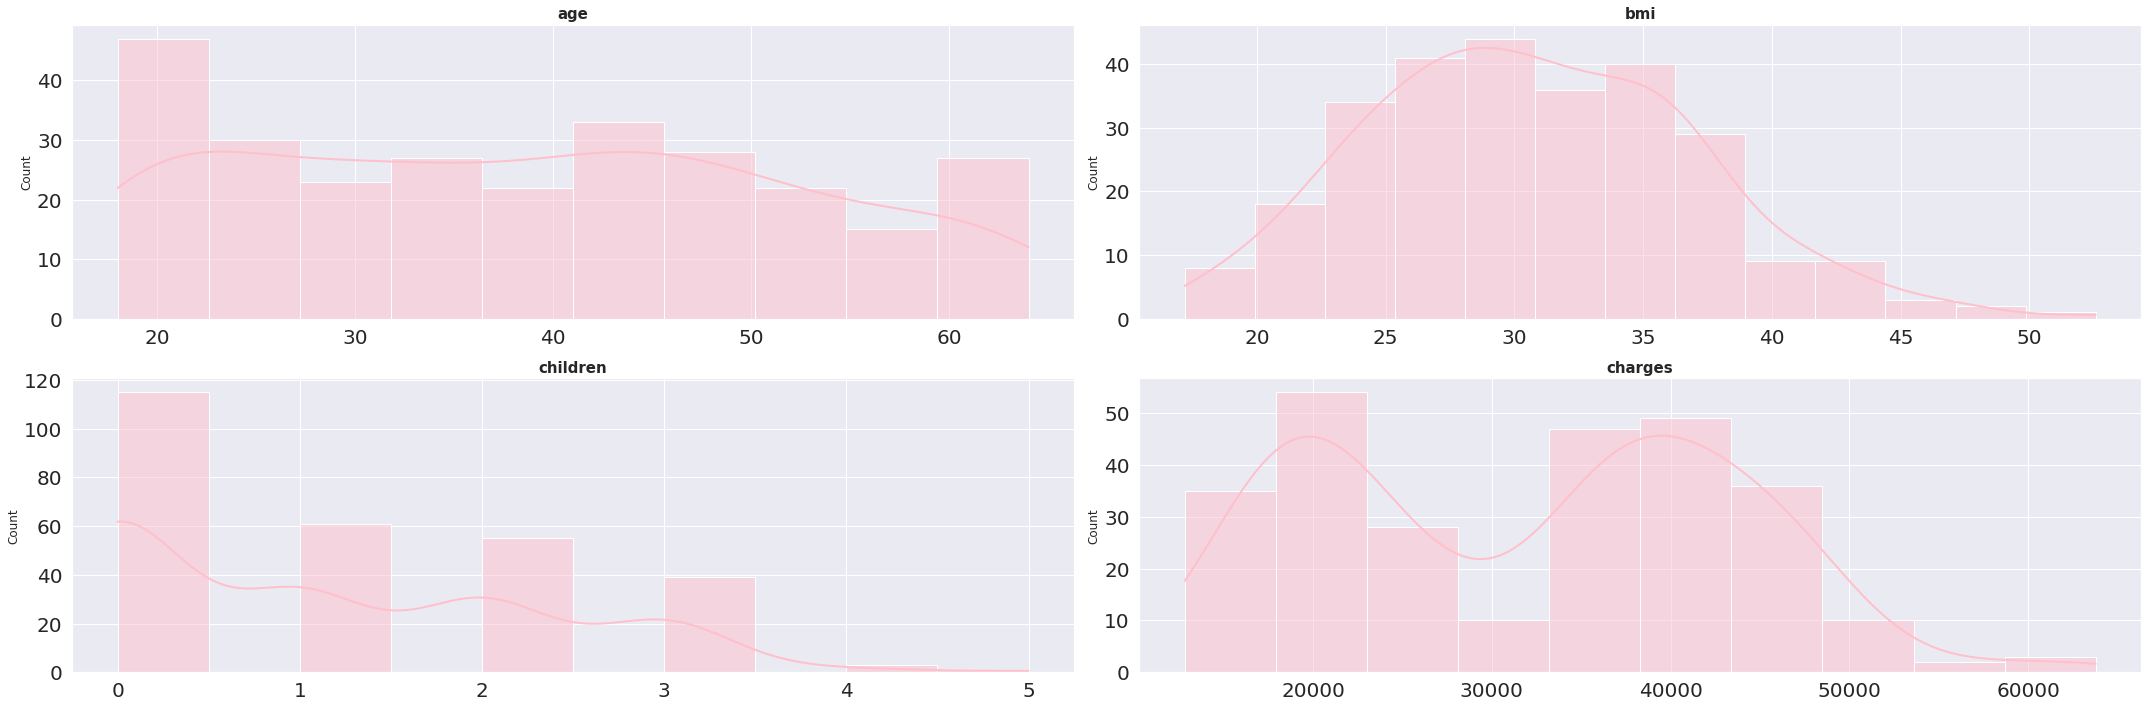

In [74]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat#iterador


for i, colum in enumerate(numericas1.columns): 
    sns.histplot(
        data = numericas1[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

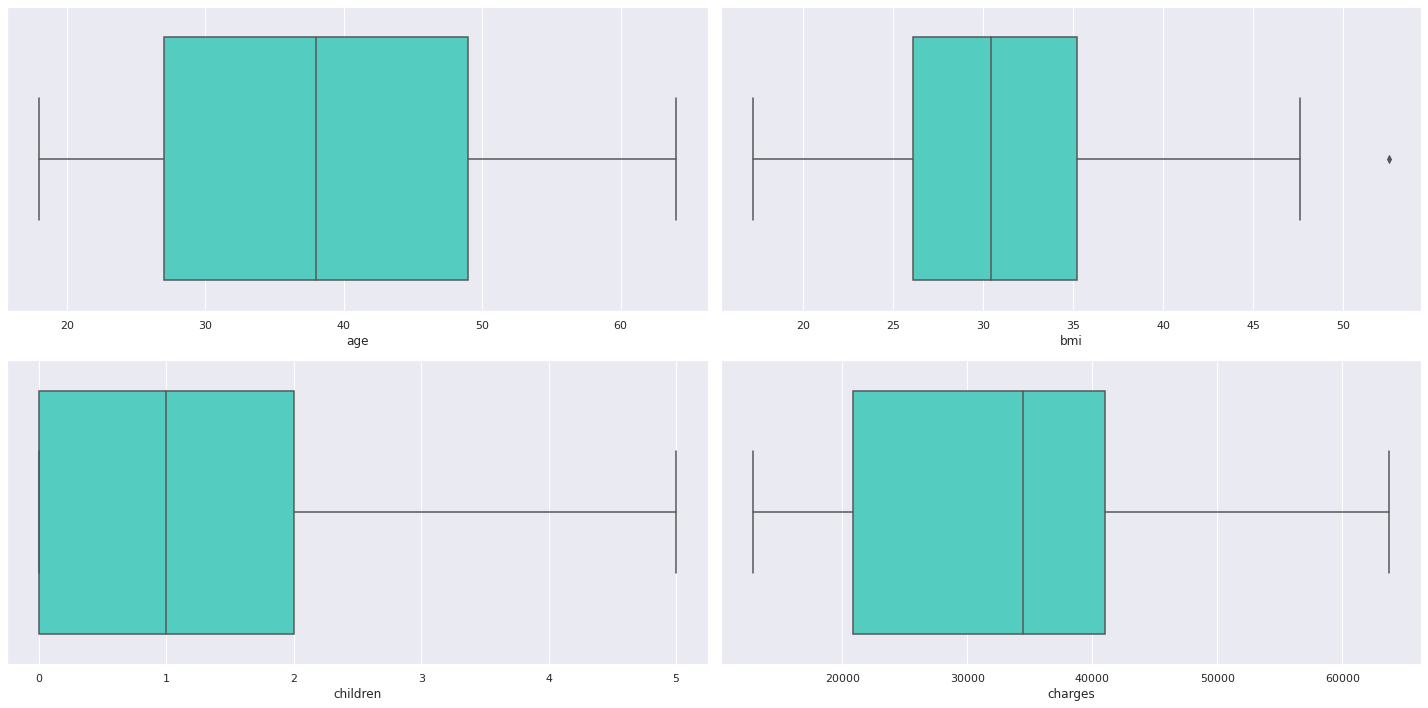

In [75]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas1.columns):
    sns.boxplot(x = numericas1[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad

    
plt.tight_layout()


plt.show();

In [76]:
df1.shape

(274, 7)

In [77]:
df2 = df[(df['smoker'] == 'no')]
df2.sample(5)

,age,sex,bmi,children,smoker,region,charges
534,64,male,40.48,0,no,southeast,13831.11520
1167,29,female,24.60,2,no,southwest,4529.47700
925,50,male,32.11,2,no,northeast,25333.33284
350,57,female,23.18,0,no,northwest,11830.60720
357,47,male,29.83,3,no,northwest,9620.33070


In [78]:
df2.shape

(1063, 7)

In [79]:
numericas2 = df2.select_dtypes(include = np.number)

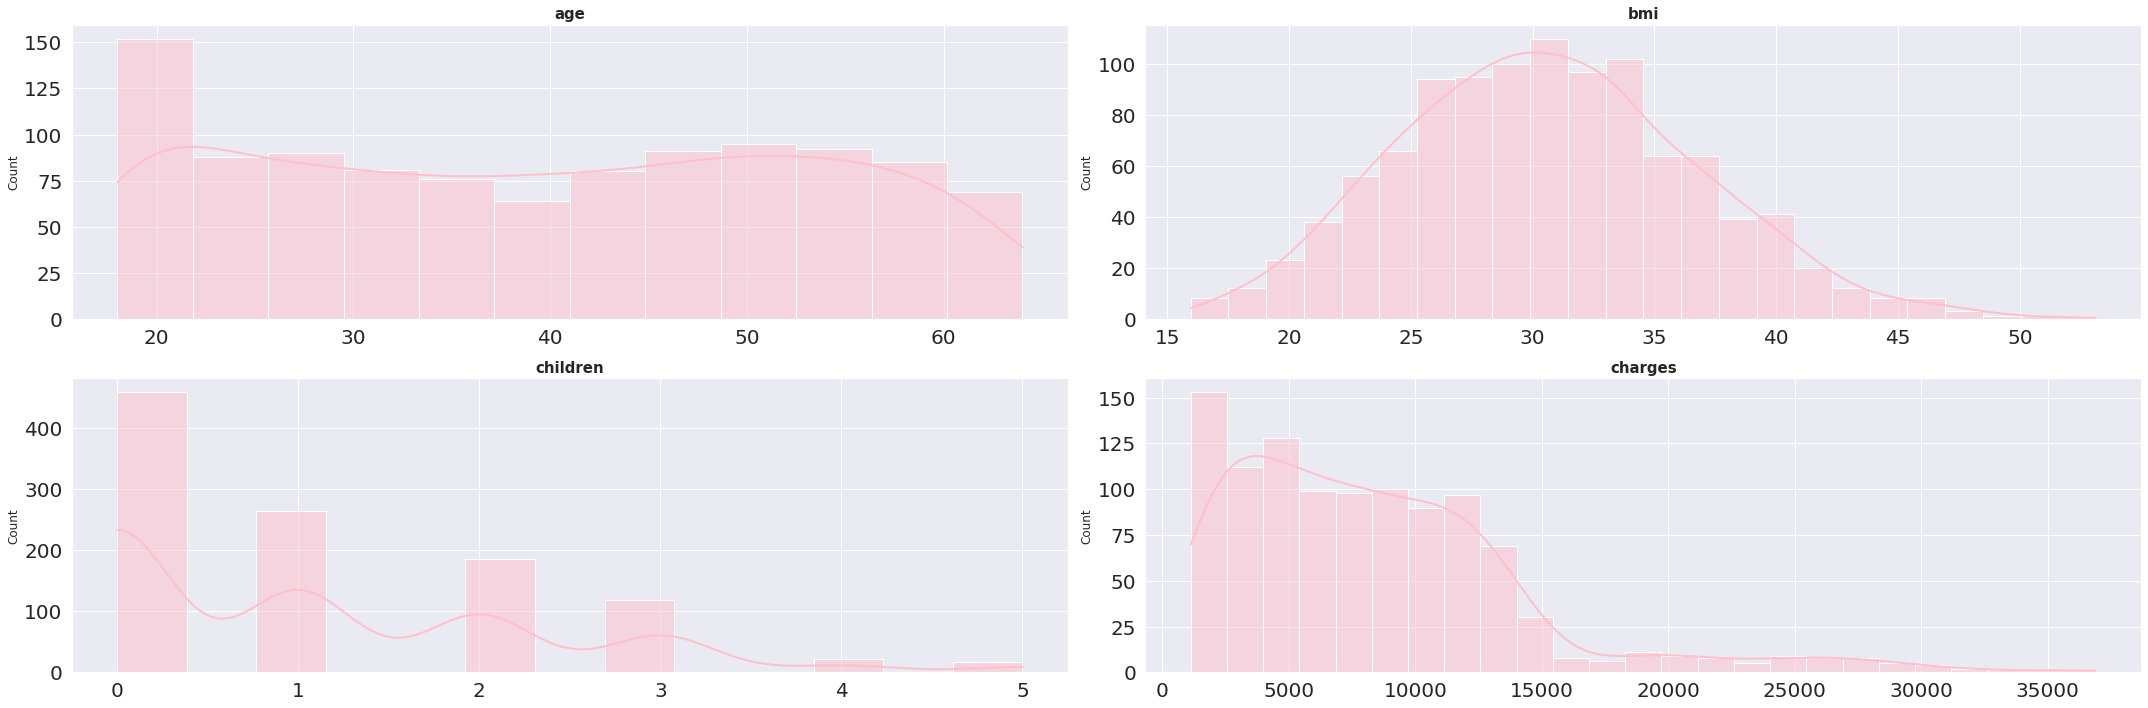

In [80]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat#iterador


for i, colum in enumerate(numericas2.columns): 
    sns.histplot(
        data = numericas2[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

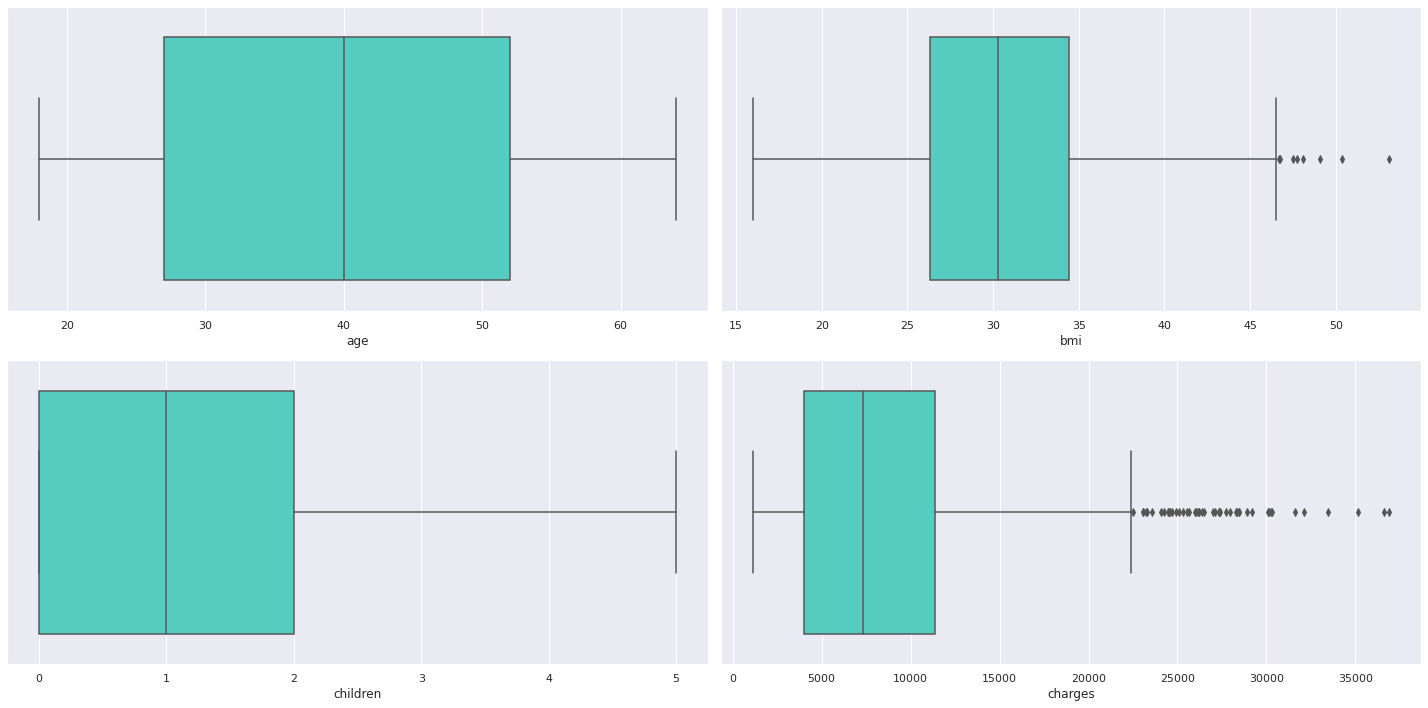

In [81]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas2.columns):
    sns.boxplot(x = numericas2[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad

    
plt.tight_layout()


plt.show();

#### Intentamos según los costes

In [82]:
df3 = df[(df['charges']<20000)]
df3.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [83]:
numericas3=df3.select_dtypes(np.number)

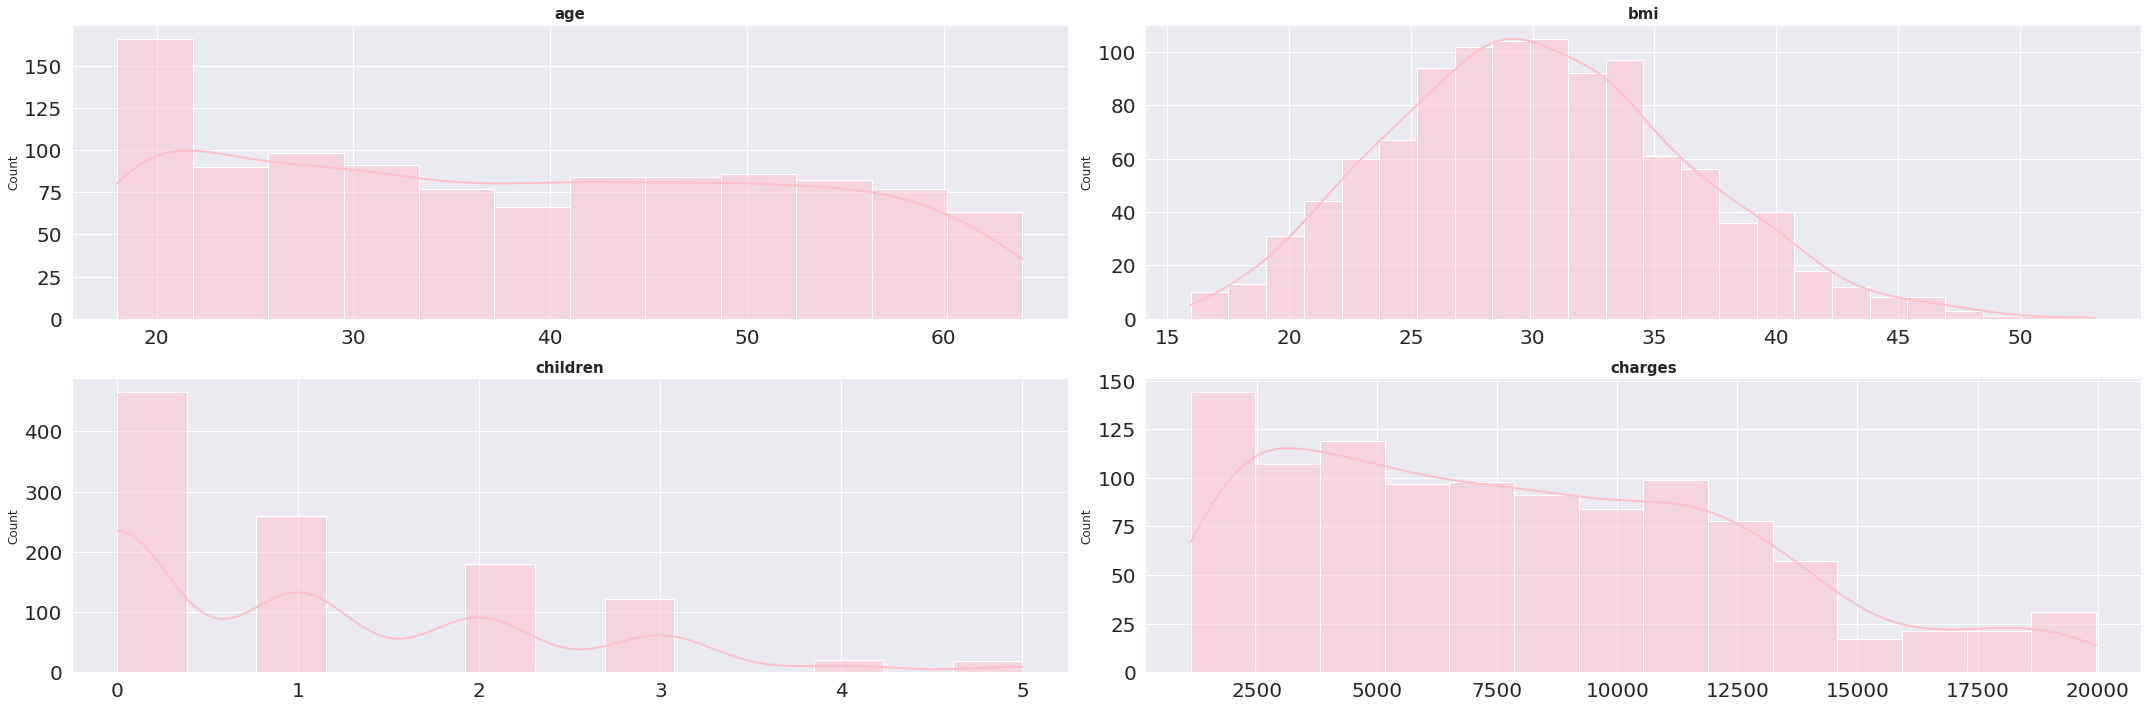

In [84]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))


axes = axes.flat#iterador


for i, colum in enumerate(numericas3.columns): 
    sns.histplot(
        data = numericas3[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

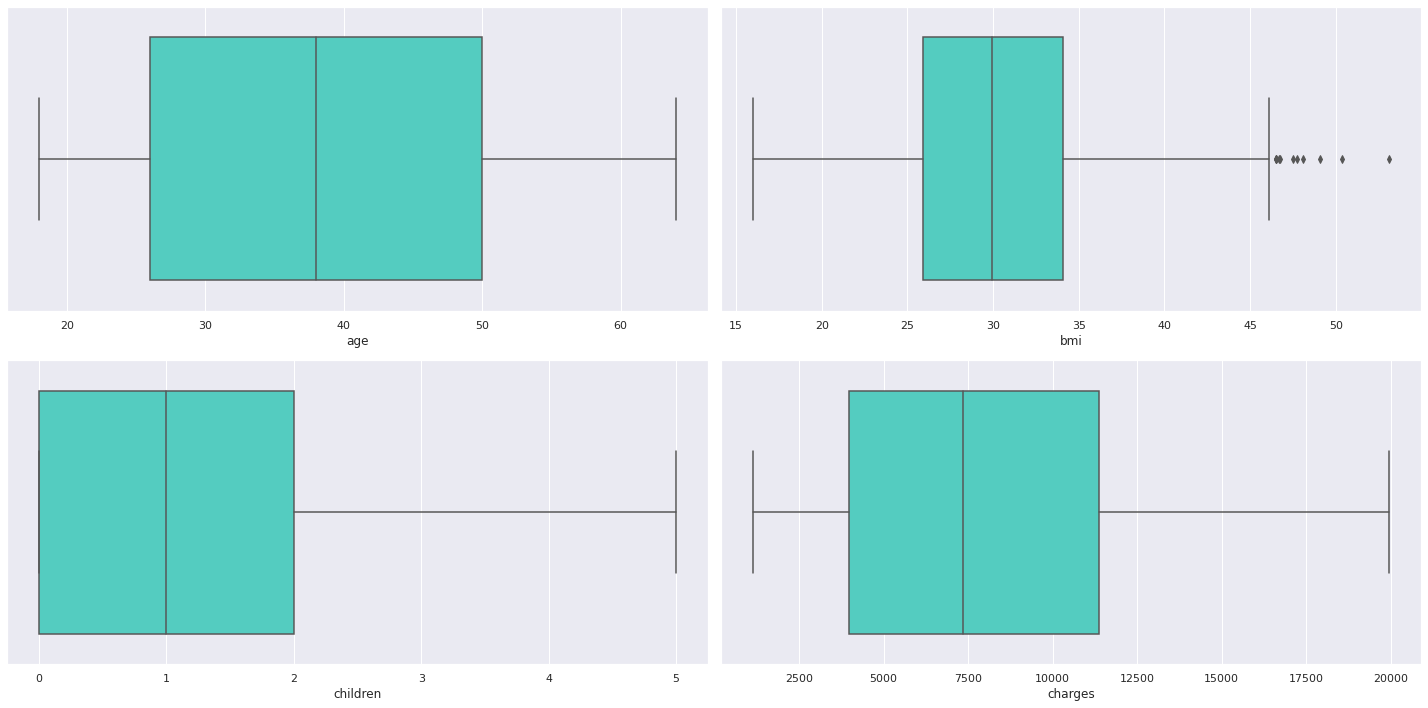

In [85]:
fig, axes = plt.subplots(2,2, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas3.columns):
    sns.boxplot(x = numericas3[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad

    
plt.tight_layout()


plt.show();

In [86]:
df3.shape

(1064, 7)

In [87]:
df4 = df[(df['charges']>=20000)]
df4.head(2)

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
9,60,female,25.840,0,no,northwest,28923.13692


In [88]:
numericas4=df4.select_dtypes(np.number)

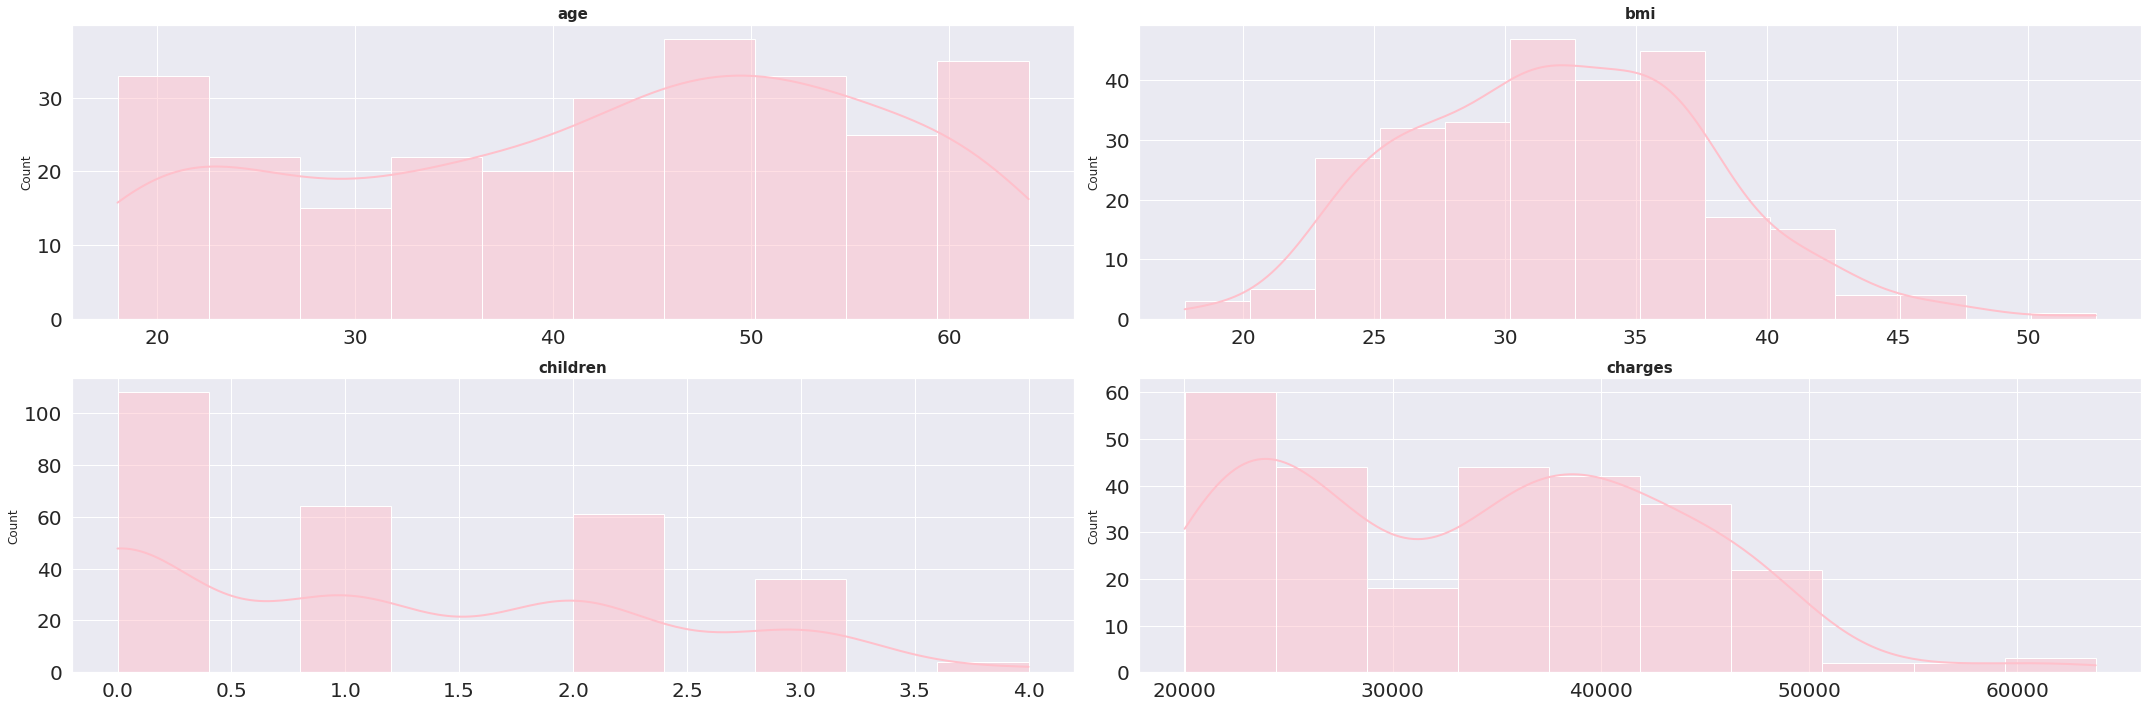

In [89]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))
axes = axes.flat#iterador
for i, colum in enumerate(numericas4.columns): 
    sns.histplot(
        data = numericas4[colum],
        kde = True,
        color = "pink", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout();

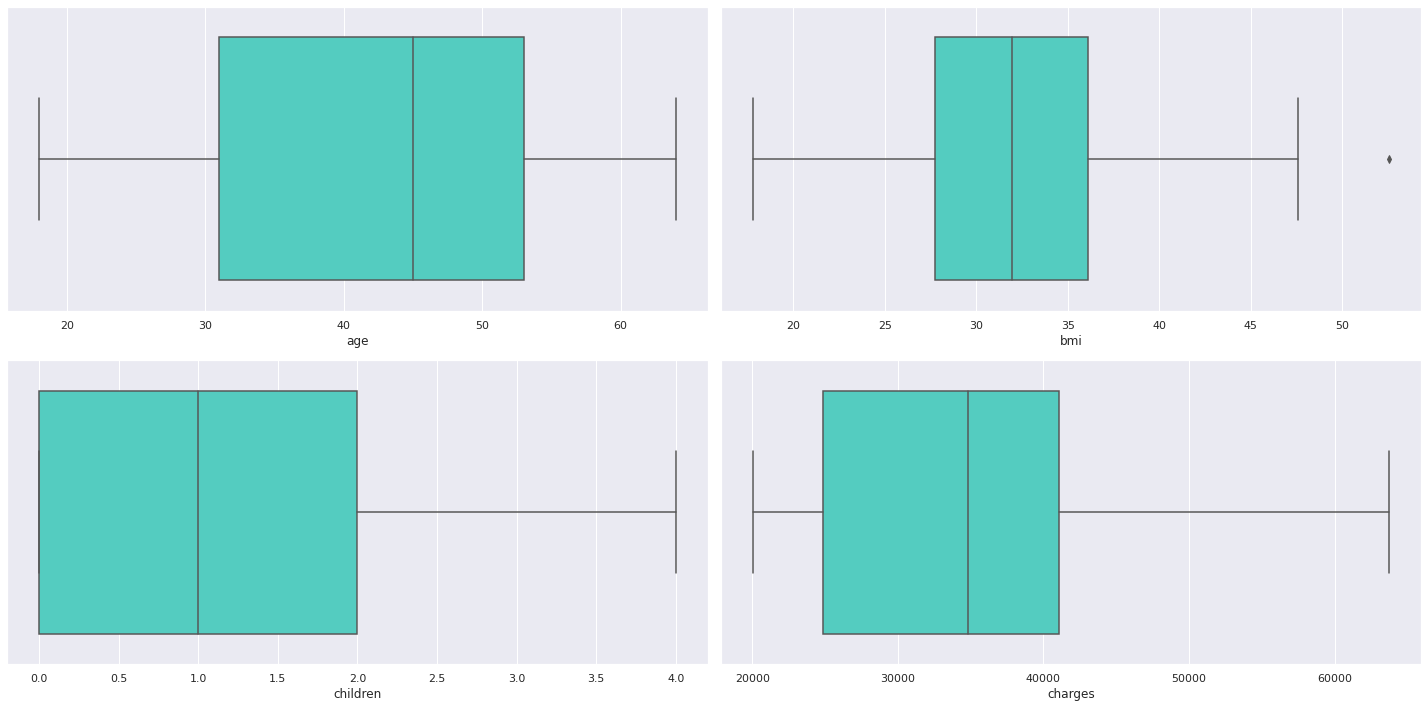

In [90]:
fig, axes = plt.subplots(2,2, figsize=(20,10))
axes = axes.flat
for indice, columna in enumerate(numericas4.columns):
    sns.boxplot(x = numericas4[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad   
plt.tight_layout()
plt.show();

In [91]:
df4.shape

(273, 7)

In [92]:
df5=df.drop('charges', axis=1)
df5.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [93]:
numericas5=df5.select_dtypes(np.number)

Detectar valores de los outliers

In [94]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [95]:
lista_columnas2 = list(numericas5.columns)
ind5 = detectar_outliers(lista_columnas2, df5)

In [96]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)

In [97]:
# en que columnas nos hemos encontrado con outliers? 
ind.keys()

dict_keys(['bmi', 'charges'])

In [98]:
ind5.keys()

dict_keys(['bmi'])

In [99]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in ind.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    for i in v:
        df.loc[i,k] = mediana



In [100]:
# Iteramos por el diccionario que hemos creado con los índices de los outliers
for k, v in ind5.items():
    # Sacamos la mediana de cada columna numérica
    mediana = df5[k].median()
    # iteramos por cada fila de la columna en la que hay outliers y convertimos ese valor en la mediana
    for i in v:
        df_copi.loc[i,k] = mediana



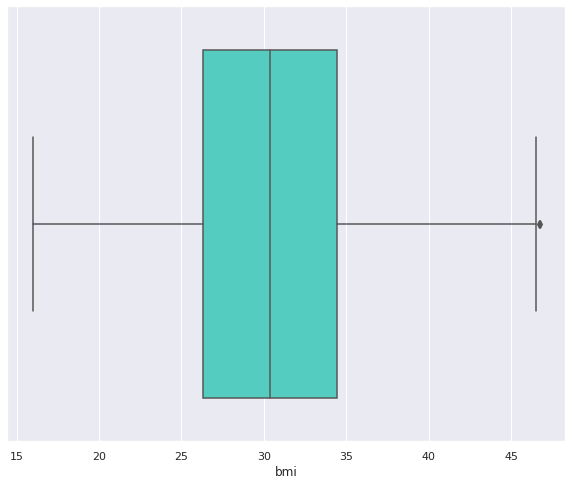

In [101]:
sns.boxplot(x = df_copi['bmi'], data = df_copi, color = "turquoise");

## Evaluar cuáles de las columnas tendremos que limpiar en nuestro *dataframe* y limpiarlas. 

### Gestión de *outliers*

Lo primero que haremos será chequear de nuevo los principales estadísticos de nuestras columnas para decidir con que valor reemplazamos los *outliers* 

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.000
bmi,1337.0,30.536384,5.902206,15.9600,26.290,30.4000,34.43000,46.750
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.000
charges,1337.0,9877.646363,6855.277943,1121.8739,4746.344,9386.1613,12269.68865,34472.841


## Analizar las relaciones entre las variables. 

### Variable respuesta

In [103]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


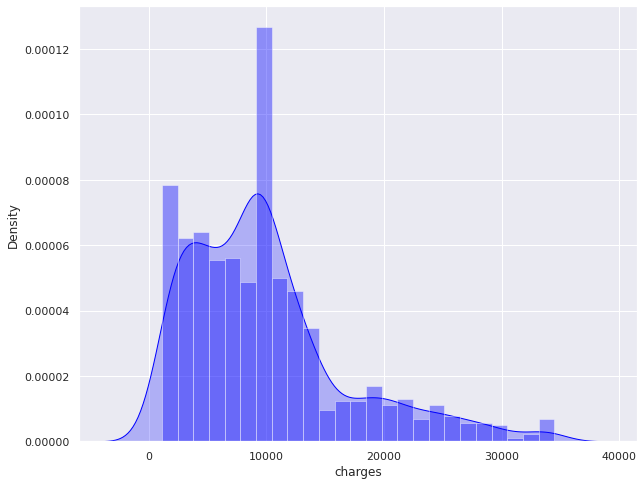

In [104]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});


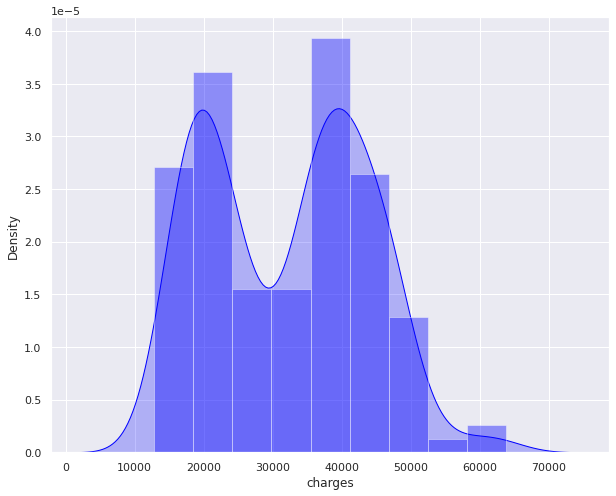

In [105]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df1["charges"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

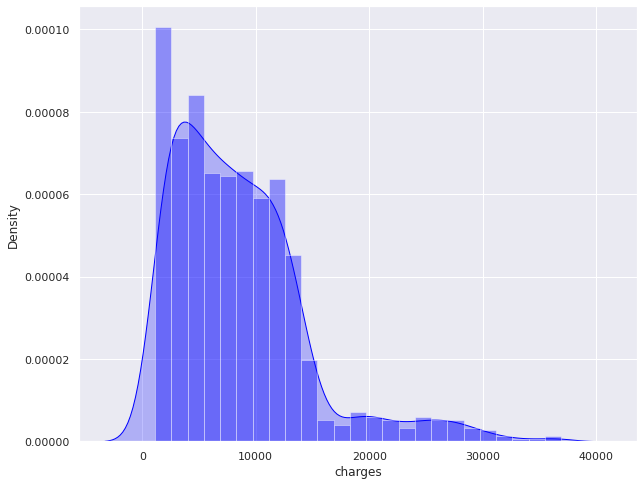

In [106]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df2["charges"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

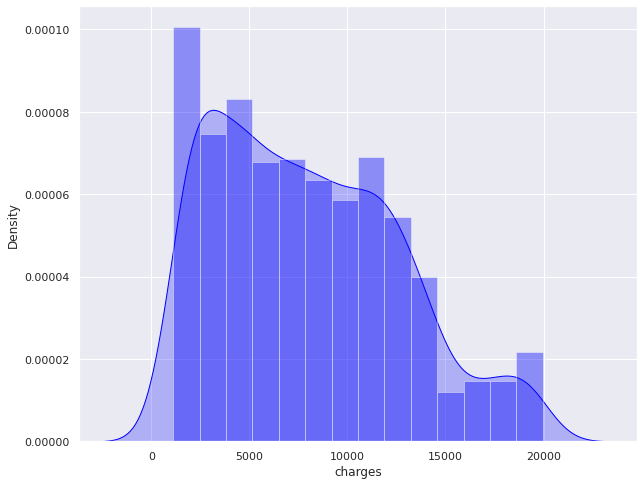

In [107]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df3["charges"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [108]:
df3.skew()

age         0.136459
bmi         0.315155
children    1.018603
charges     0.524514
dtype: float64

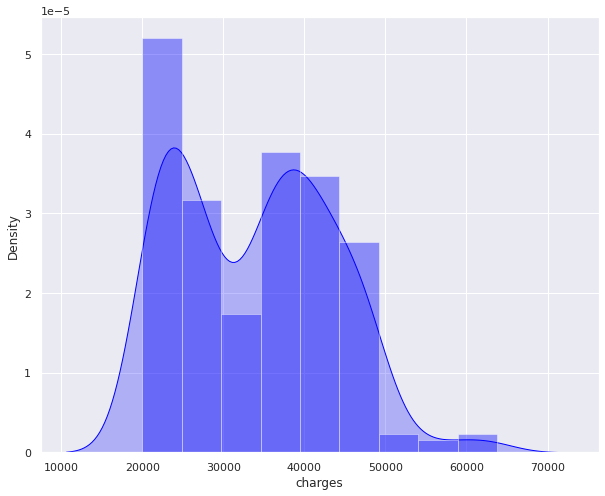

In [109]:
# vamos a ver visualmente como está distribuida la variable respuesta
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df4["charges"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

### Aparentemente, la división según cuantía es más equilibrada, las dos distribuciones que nos resultan son mas cercanas a la normalidad.
df3 y df4

### Variables predictoras

#### Variables numéricas

In [110]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.000
bmi,1337.0,30.536384,5.902206,15.9600,26.290,30.4000,34.43000,46.750
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.000
charges,1337.0,9877.646363,6855.277943,1121.8739,4746.344,9386.1613,12269.68865,34472.841


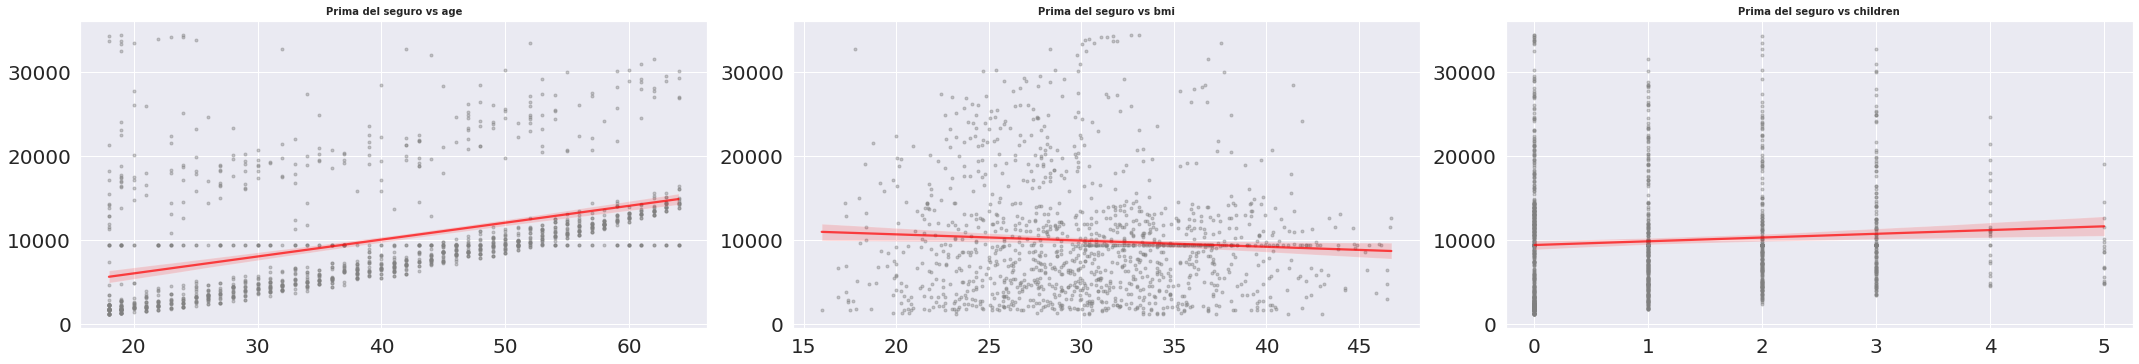

In [111]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Prima del seguro vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

<AxesSubplot:xlabel='age', ylabel='charges'>

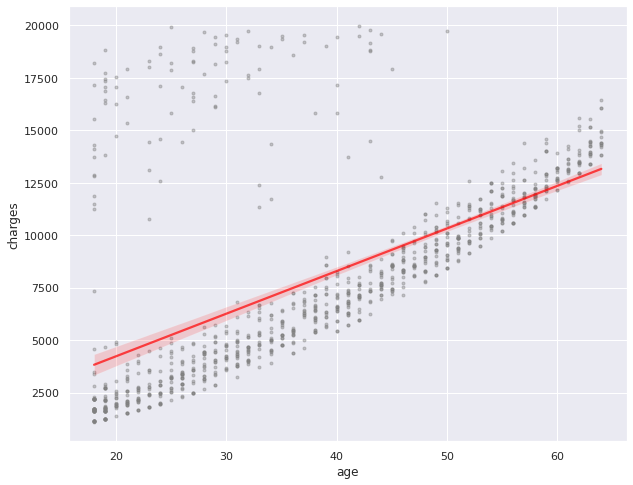

In [130]:
sns.regplot(
        x = df3['age'], 
        y = df3["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 } )

<AxesSubplot:xlabel='age', ylabel='charges'>

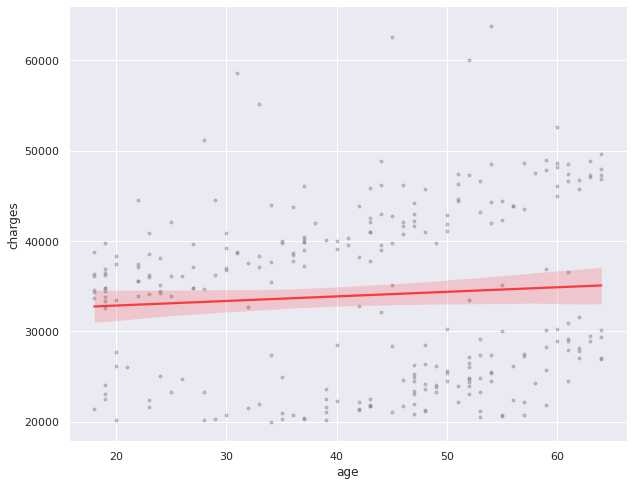

In [131]:
sns.regplot(
        x = df4['age'], 
        y = df4["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 })

<AxesSubplot:xlabel='bmi', ylabel='charges'>

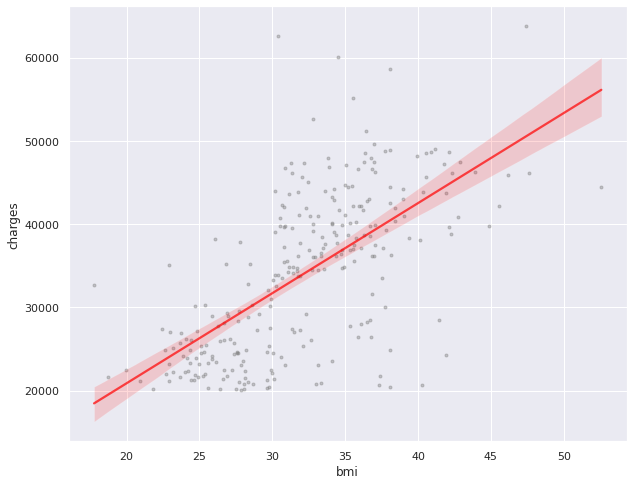

In [133]:
sns.regplot(
        x = df4['bmi'], 
        y = df4["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 })

No handles with labels found to put in legend.


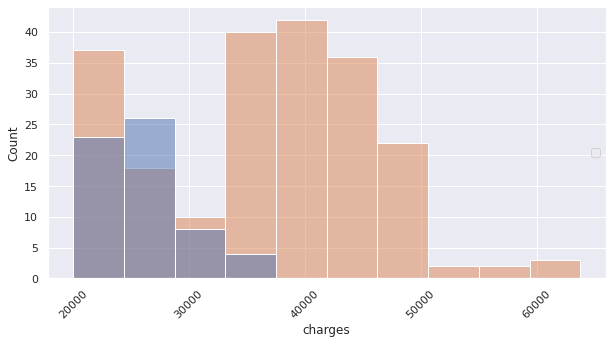

In [137]:
plt.figure(figsize = (10,5))  # establecemos el tamaño de la gráfica
sns.histplot(data =df4, x = "charges", hue = "smoker") 
plt.xticks(rotation = 45) # rotamos las etiquetas del eje x para que estén a 45 grados
plt.legend( bbox_to_anchor=(1, 0.5)); 

#### Correlación entre variables numéricas

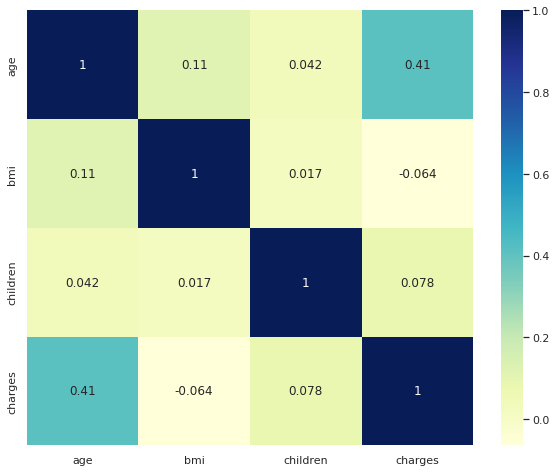

In [112]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

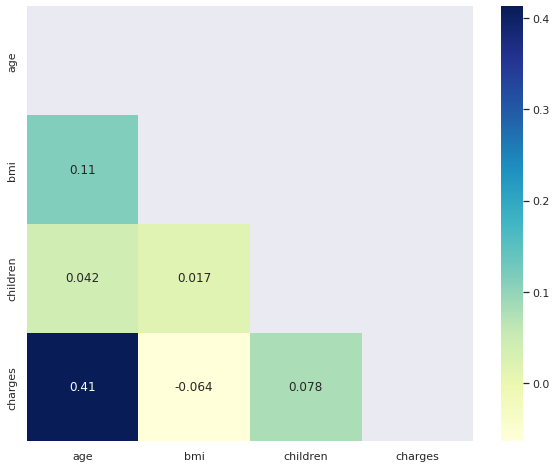

In [113]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación

mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

#### Variables categóricas

In [114]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [115]:
categoricas = df.select_dtypes(include = 'object').describe().T
categoricas.head()

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


# Region

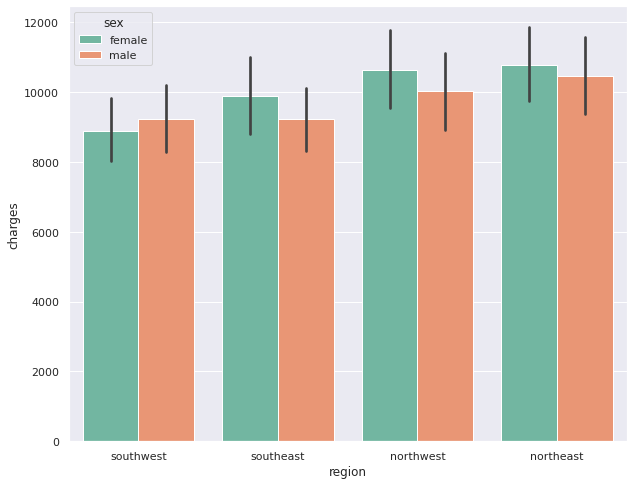

In [116]:
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Set2');

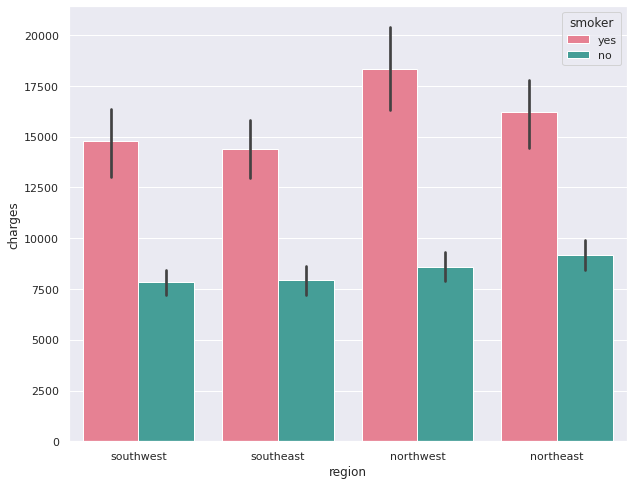

In [117]:
sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='husl');

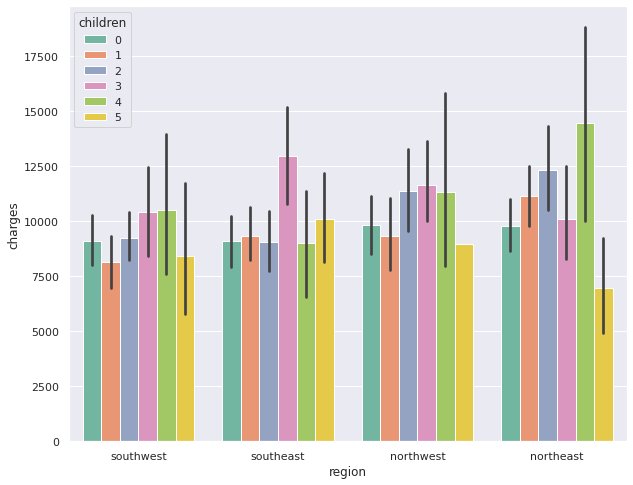

In [118]:
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2');

# Children

<AxesSubplot:xlabel='children', ylabel='charges'>

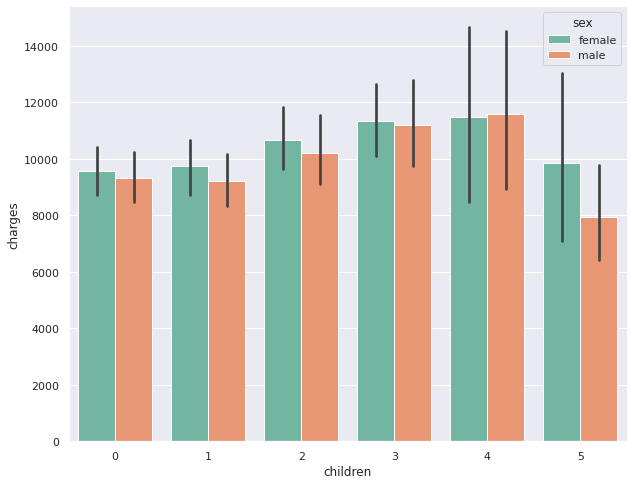

In [119]:
sns.barplot(x='children', y='charges', hue='sex', data=df, palette='Set2')

<AxesSubplot:xlabel='children', ylabel='charges'>

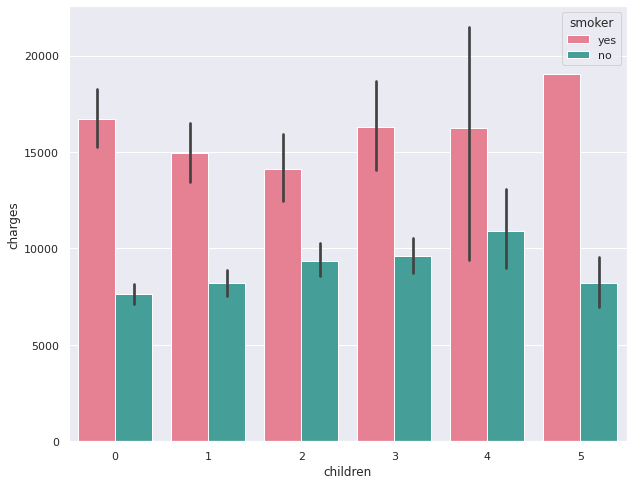

In [120]:
sns.barplot(x = 'children', y = 'charges',
                 hue='smoker', data=df, palette='husl')

<AxesSubplot:xlabel='children', ylabel='charges'>

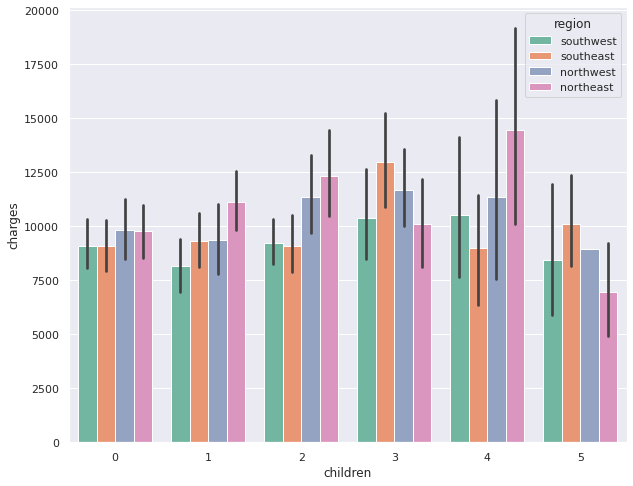

In [121]:
sns.barplot(x='children', y='charges', hue='region', data=df, palette='Set2')

# Smoker

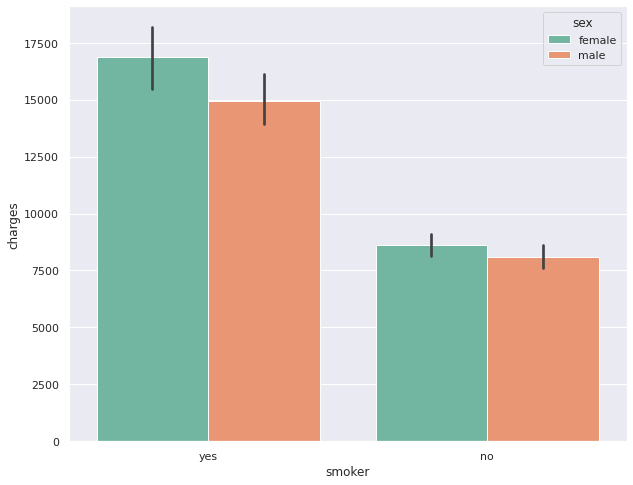

In [122]:
sns.barplot(x='smoker', y='charges', hue='sex', data=df, palette='Set2');

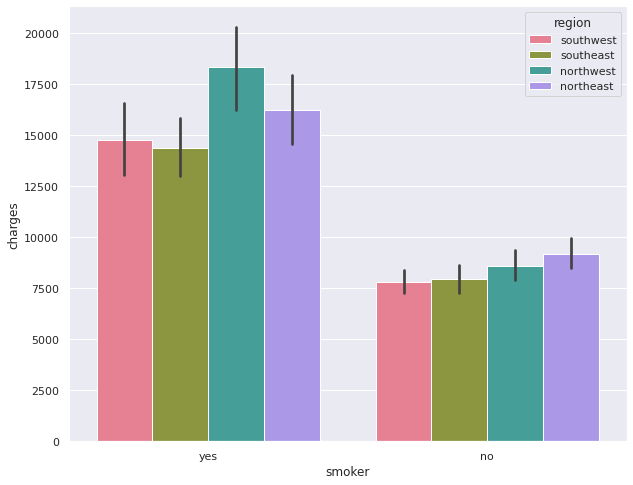

In [123]:
sns.barplot(x = 'smoker', y = 'charges',
                 hue='region', data=df, palette='husl');

<AxesSubplot:xlabel='smoker', ylabel='charges'>

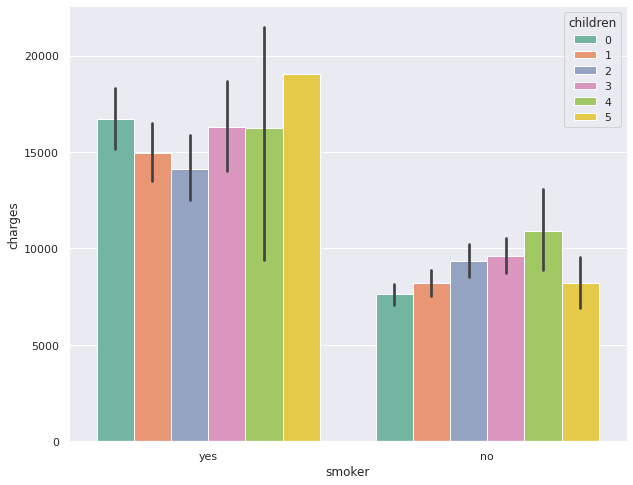

In [124]:
sns.barplot(x='smoker', y='charges', hue='children', data=df, palette='Set2')

In [125]:
df1.to_csv("data/01-dataframe_fumadores.csv" )

In [126]:
df2.to_csv("data/02-dataframe_no_fumadores.csv" )

In [127]:
df3.to_csv("data/03-primas_altas.csv" )

In [128]:
df4.to_csv("data/04-primas_bajas.csv" )

In [129]:
df_copi.to_csv('data/05-bmi_normal.csv')